In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
from xgboost import XGBClassifier
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt


In [2]:
# !pip install XGBoost

In [7]:
pima_df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [9]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
pima_df.shape

(768, 9)

In [11]:
pima_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
X = pima_df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = pima_df.loc[:,'Outcome']

In [13]:
print('Data matrix ',X.shape)
print('Predicted label ',Y.shape)

Data matrix  (768, 8)
Predicted label  (768,)


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=123)

In [15]:
print('Dimension of train data ',x_train.shape)
print('Dimension of test data ',x_test.shape)

Dimension of train data  (460, 8)
Dimension of test data  (308, 8)


**Observation 1**

XGBoost- Type 1

In [38]:
clf = XGBClassifier(random_state=123)
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

[21:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
train_score = accuracy_score(y_train,y_pred_train)
test_score = accuracy_score(y_test,y_pred_test)

In [41]:
print('Acccuracy with train data ',train_score*100)
print('Accuracy with test data ',test_score*100)

Acccuracy with train data  100.0
Accuracy with test data  73.7012987012987


**Observation 2**

XGBoost - Type 2

#of estimators

[00:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

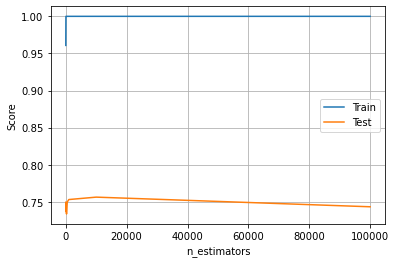

,n_estimators,Train score,Test score
0,10,0.96087,0.746753
1,50,1.00000,0.750000
2,75,1.00000,0.743506
3,100,1.00000,0.737013
4,150,1.00000,0.746753
5,200,1.00000,0.737013
6,250,1.00000,0.733766
7,500,1.00000,0.750000
8,1000,1.00000,0.753247
9,10000,1.00000,0.756494


In [61]:
n_base_learners = [10,50,75,100,150,200,250,500,1000,10000,100000]
tr_score = []
test_score = []
for i in n_base_learners:
    clf = XGBClassifier(n_estimators = i,random_state=100)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    tr_score.append(accuracy_score(y_train,y_pred_train))
    test_score.append(accuracy_score(y_test,y_pred_test))
    
plt.plot(n_base_learners,tr_score,label='Train')
plt.plot(n_base_learners,test_score,label = 'Test')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

pd.DataFrame({'n_estimators':n_base_learners,'Train score ':tr_score,'Test score ':test_score})

**Onservation - 3**

The Max depth

[01:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:06:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:06:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:06:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

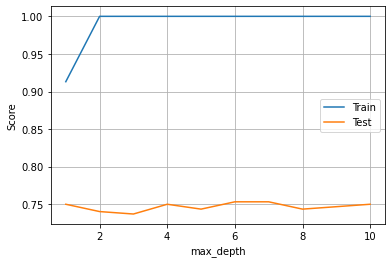

,max_depth,Train score,Test score
0,1,0.913043,0.750000
1,2,1.000000,0.740260
2,3,1.000000,0.737013
3,4,1.000000,0.750000
4,5,1.000000,0.743506
5,6,1.000000,0.753247
6,7,1.000000,0.753247
7,8,1.000000,0.743506
8,9,1.000000,0.746753
9,10,1.000000,0.750000


In [67]:
%timeit
max_depth = [1,2,3,4,5,6,7,8,9,10]
tr_score = []
test_score = []
for i in max_depth:
    clf = XGBClassifier(n_estimators = 1000,random_state=100,max_depth = i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    tr_score.append(accuracy_score(y_train,y_pred_train))
    test_score.append(accuracy_score(y_test,y_pred_test))
    
plt.plot(max_depth,tr_score,label='Train')
plt.plot(max_depth,test_score,label = 'Test')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

pd.DataFrame({'max_depth':max_depth,'Train score ':tr_score,'Test score ':test_score})

**Observation - 4**

The learning rate - mu

[01:49:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:49:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

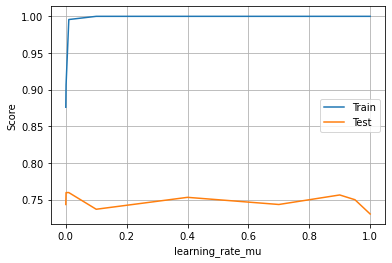

,learning_rate_mu,Train score,Test score
0,0.0001,0.876087,0.743506
1,0.0010,0.906522,0.759740
2,0.0100,0.995652,0.759740
3,0.1000,1.000000,0.737013
4,0.4000,1.000000,0.753247
5,0.7000,1.000000,0.743506
6,0.9000,1.000000,0.756494
7,0.9500,1.000000,0.750000
8,1.0000,1.000000,0.730519


In [71]:
%timeit
learning_rate_mu = [0.0001,0.001,0.01,0.1,0.4,0.7,0.9,0.95,1]
tr_score = []
test_score = []
for i in learning_rate_mu:
    clf = XGBClassifier(n_estimators = 1000,random_state=100,max_depth = 6,learning_rate = i)
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    tr_score.append(accuracy_score(y_train,y_pred_train))
    test_score.append(accuracy_score(y_test,y_pred_test))
    
plt.plot(learning_rate_mu,tr_score,label='Train')
plt.plot(learning_rate_mu,test_score,label = 'Test')
plt.xlabel('learning_rate_mu')
plt.ylabel('Score')
plt.grid()
plt.legend()
plt.show()

pd.DataFrame({'learning_rate_mu':learning_rate_mu,'Train score ':tr_score,'Test score ':test_score})

**Observation - 5**

Fitting the model with all the best parameters

In [73]:
clf = XGBClassifier(n_estimators = 10000,learning_rate = 0.001,max_depth = 6)
clf.fit(x_train,y_train)
y_pred_tr = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

[01:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
train_acc = accuracy_score(y_train,y_pred_tr)
test_acc = accuracy_score(y_test,y_pred_test)
print('Accuracy with train data is ',train_acc)
print('Accuracy with train data is ',test_acc)

Accuracy with train data is  0.9956521739130435
Accuracy with train data is  0.75
